## 文字頻度：不思議の国のアリス

### 読み込み
- https://www.kaggle.com/datasets/roblexnana/alice-wonderland-dataset?resource=download からダウンロードしたデータを使用

In [1]:
import re
import warnings

import numpy as np
import matplotlib.pyplot as plt
import scienceplots

warnings.simplefilter("ignore")

In [2]:
# テキストファイルの読み込みと前処理
text_origin = open('./alice_in_wonderland.txt', 'r').read().lower() # テキストファイルを読み込む
text_only_abc = re.sub(r'[^a-z ]', '', text_origin) # アルファベット以外の文字を削除
text_remove_space = re.sub(r' +', '', text_only_abc) # 空白を削除
text_chars, chars_count = np.unique(list(text_remove_space), return_counts=True) # ユニークな文字とその出現回数を取得
chars_percent = chars_count / np.sum(chars_count) # ユニークな文字の出現回数の割合を計算

# 処理結果の確認
print('文字数: ', len(text_remove_space))
print('ユニークな文字数: ', len(text_chars))
print('ユニークな文字: ', text_chars)
print('ユニークな文字の出現回数: ', chars_count)
print('ユニークな文字の出現回数の割合: ', chars_percent)
print('ユニークな文字の出現回数の合計: ', np.sum(chars_count))
print('ユニークな文字の出現回数の割合の合計: ', np.sum(chars_percent))

文字数:  107744
ユニークな文字数:  26
ユニークな文字:  ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
ユニークな文字の出現回数:  [ 8794  1475  2400  4934 13579  2001  2531  7374  7516   146  1158  4718
  2107  7020  8147  1524   209  5440  6502 10689  3469   847  2676   148
  2262    78]
ユニークな文字の出現回数の割合:  [0.08161939 0.01368986 0.02227502 0.04579373 0.12603022 0.0185718
 0.02349087 0.06844001 0.06975794 0.00135506 0.0107477  0.04378898
 0.01955561 0.06515444 0.07561442 0.01414464 0.00193978 0.05049005
 0.06034675 0.09920738 0.03219669 0.00786123 0.02483665 0.00137363
 0.02099421 0.00072394]
ユニークな文字の出現回数の合計:  107744
ユニークな文字の出現回数の割合の合計:  1.0


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


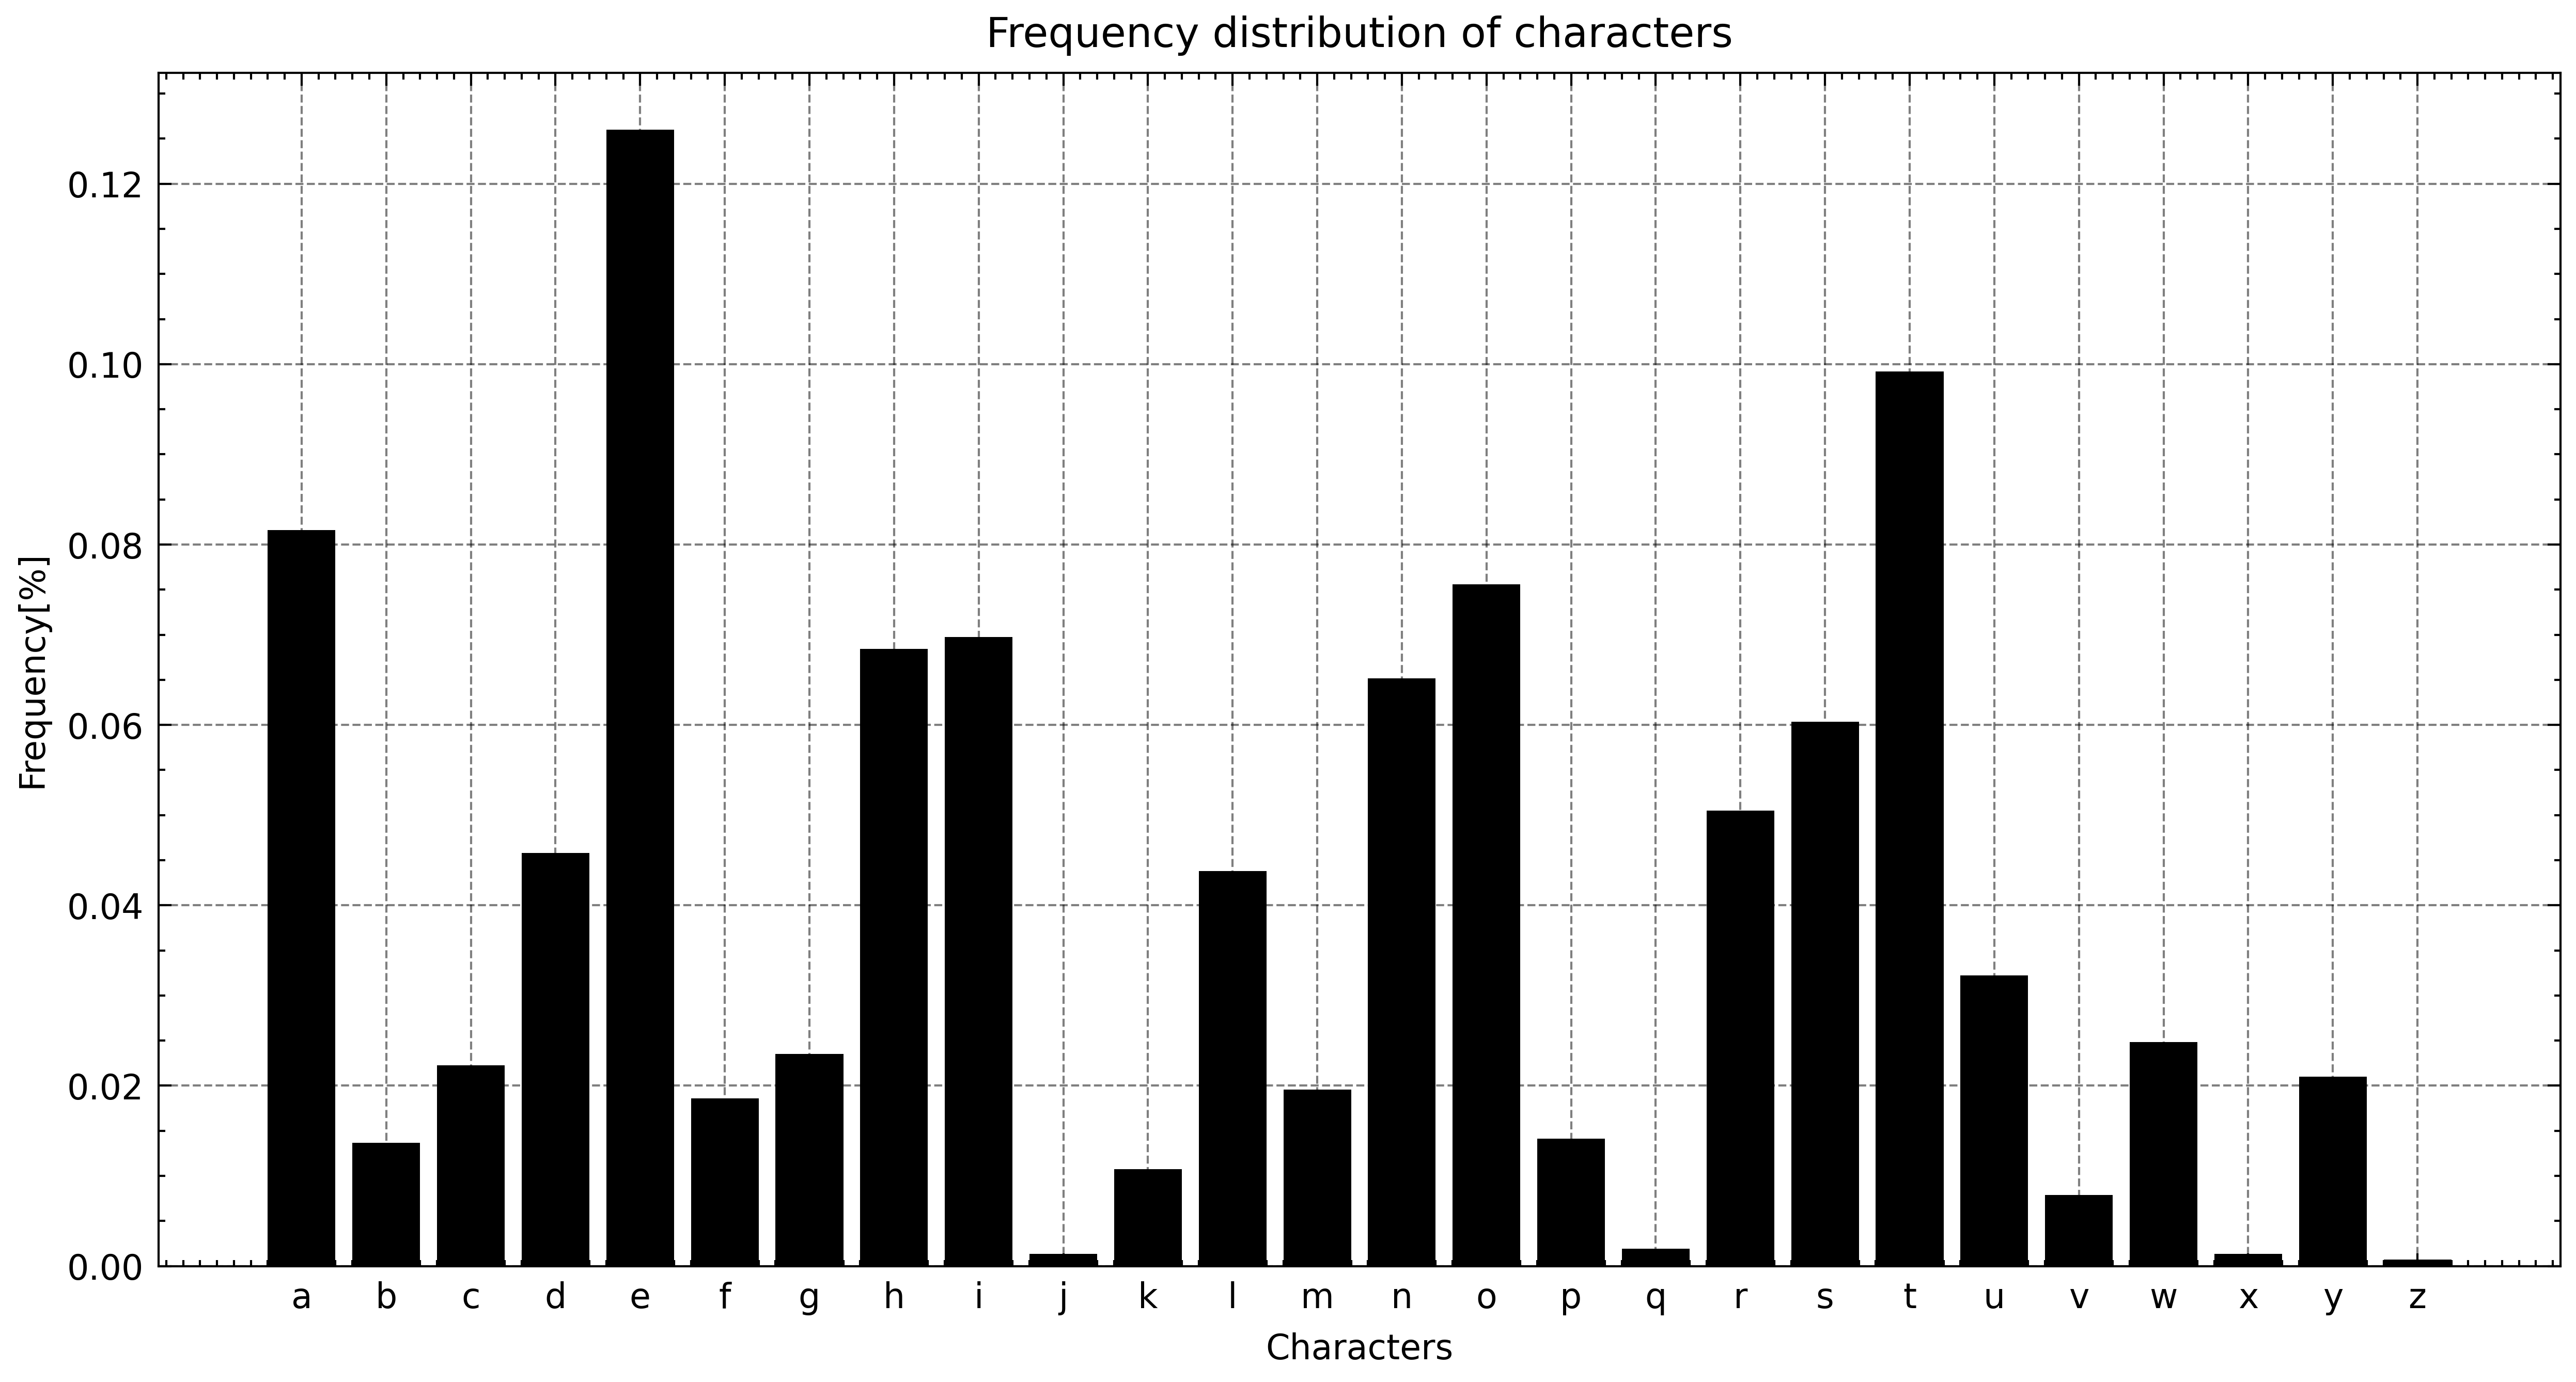

In [20]:
# 頻度分布の作成
plt.style.use(['science', 'ieee', 'grid', 'no-latex'])

plt.figure(figsize=(10, 5))
plt.bar(text_chars, chars_percent)
plt.title('Frequency distribution of characters')
plt.xlabel('Characters')
plt.ylabel('Frequency[%]')
plt.savefig('./frequency_distribution_of_characters.png', dpi=600)
plt.show()

In [4]:
# シーザー暗号の作成（単換字式暗号）
caesar_cipher = str.maketrans('abcdefghijklmnopqrstuvwxyz', 'defghijklmnopqrstuvwxyzabc') # 換字表の作成
text_caesar_cipher = text_remove_space.translate(caesar_cipher) # 換字表を用いて暗号化
text_caesar_chars, caesar_chars_count = np.unique(list(text_caesar_cipher), return_counts=True) # ユニークな文字とその出現回数を取得
caesar_chars_percent = caesar_chars_count / np.sum(caesar_chars_count) # ユニークな文字の出現回数の割合を計算
caesar_origin = [c.translate(caesar_cipher) + ":" + c for c in text_chars] # 暗号化前と暗号化後の文字を結合
caesar_origin.sort() # 暗号化前と暗号化後の文字をソート

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


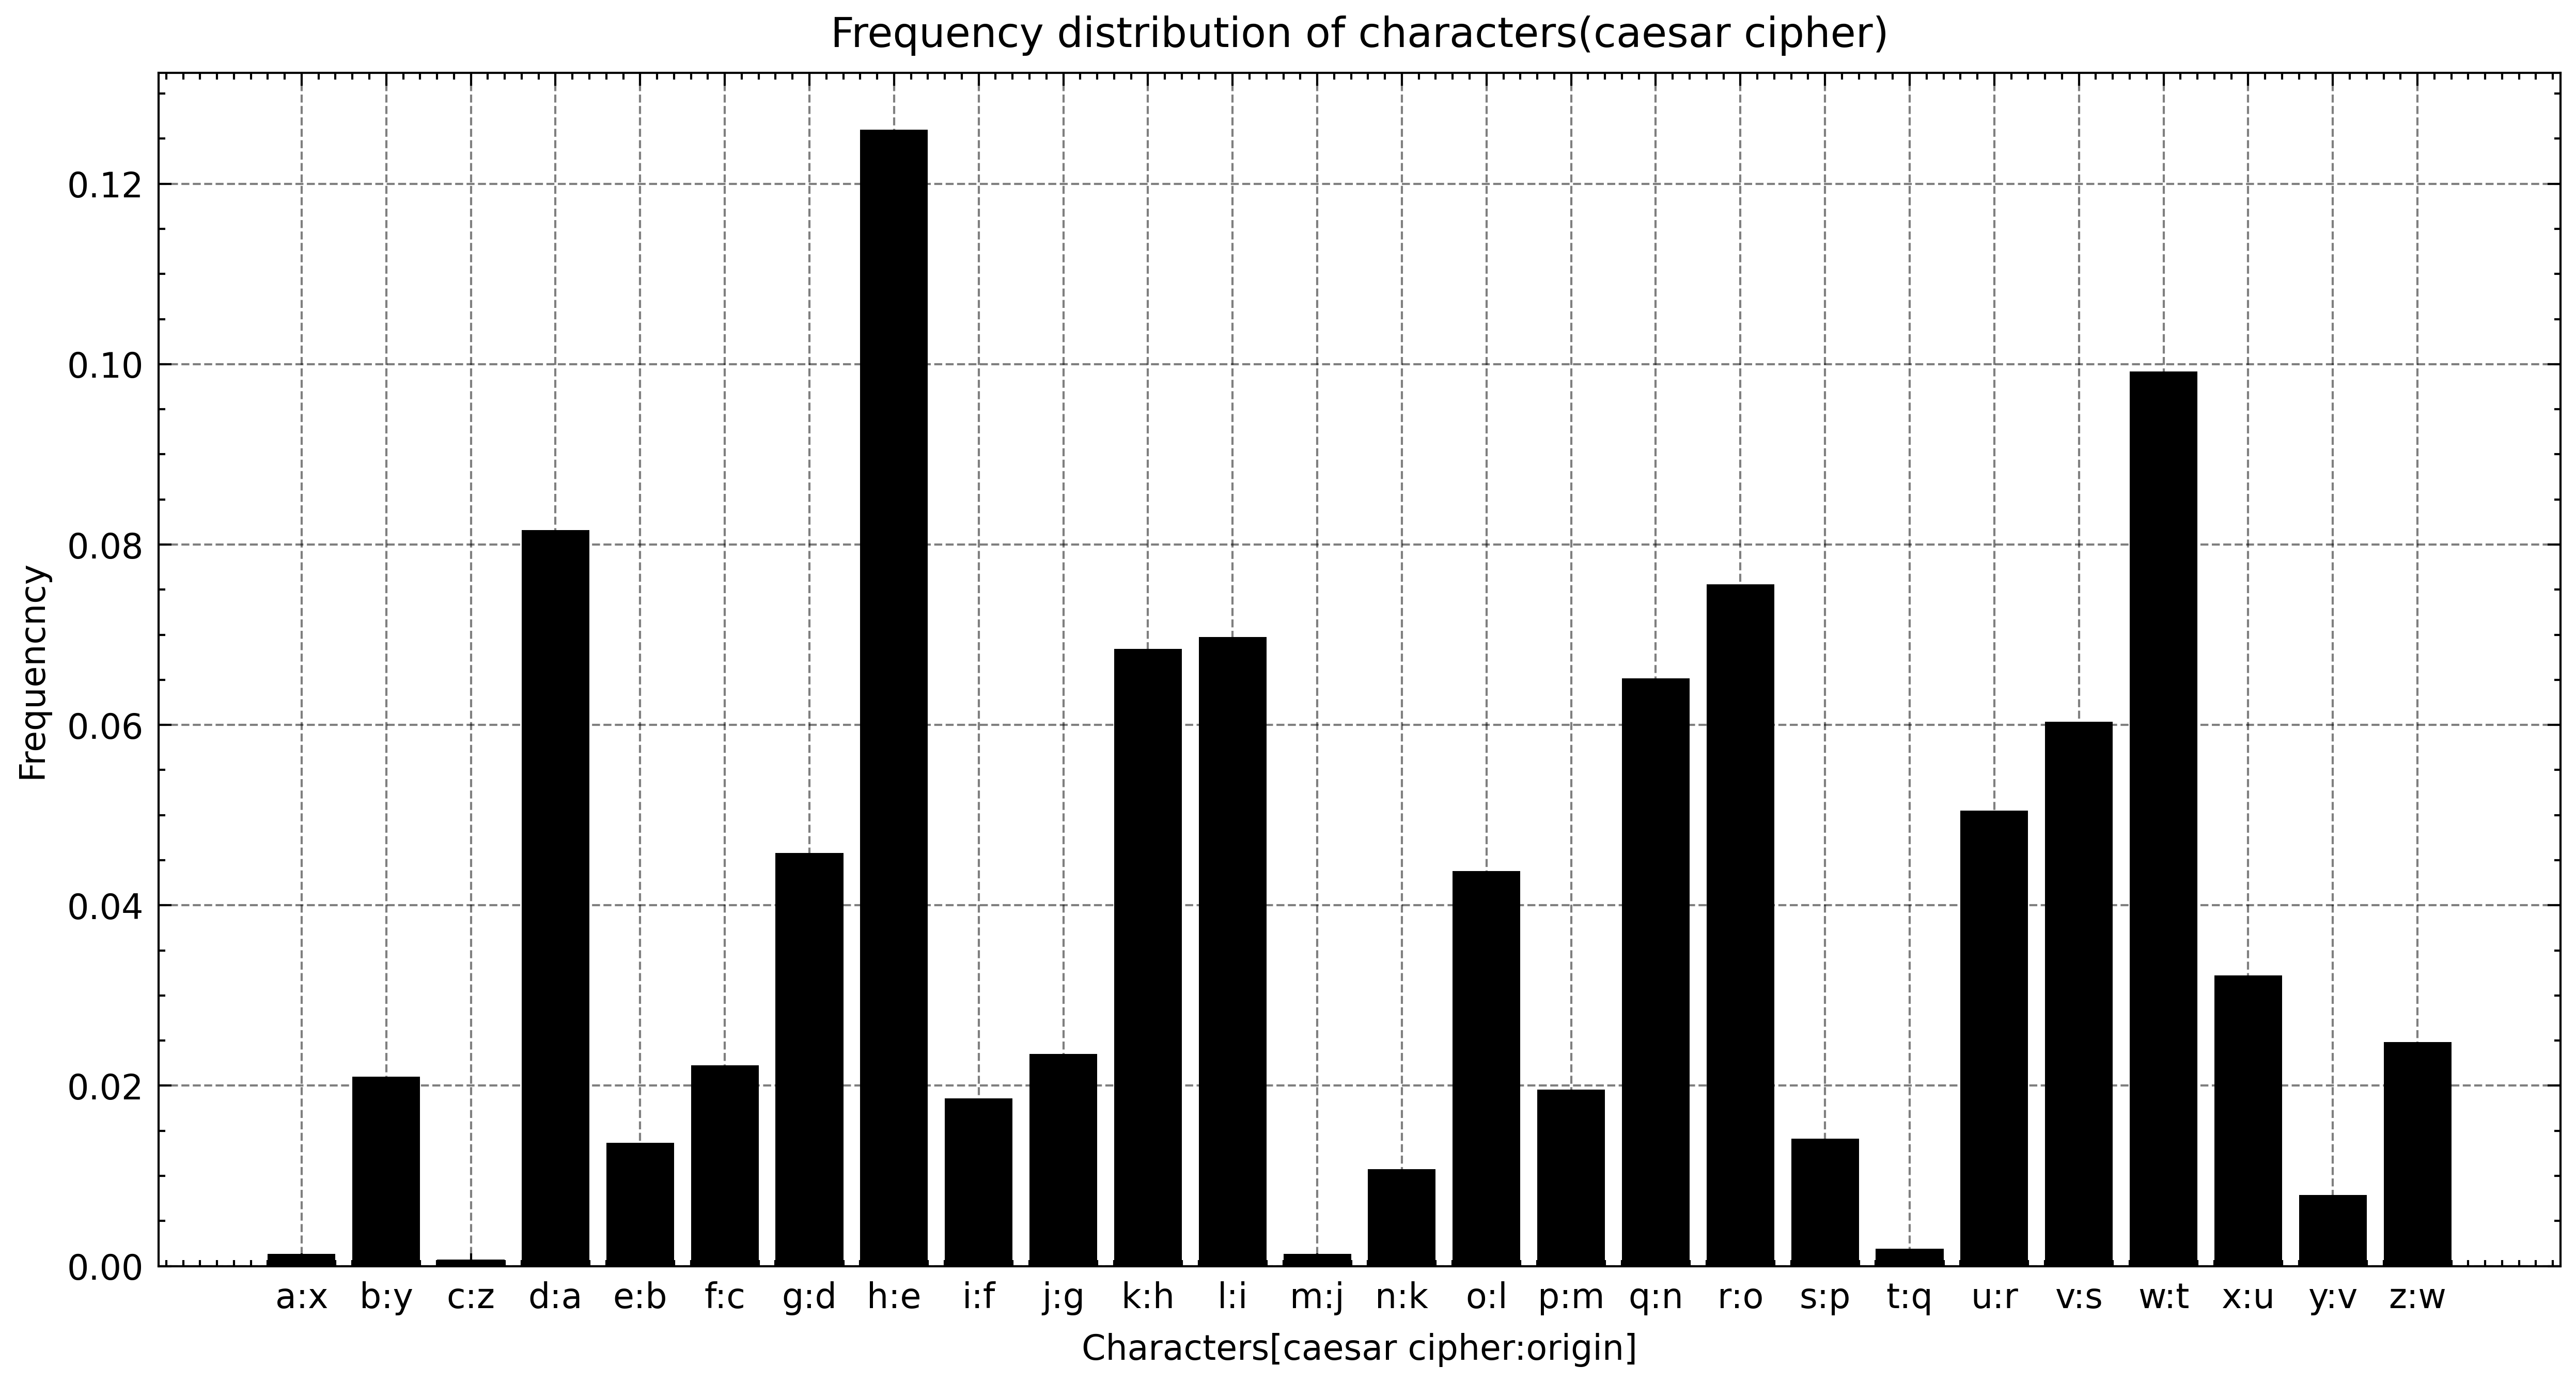

In [21]:
# 可視化
plt.figure(figsize=(10, 5))
plt.bar(caesar_origin, caesar_chars_percent)
plt.title('Frequency distribution of characters(caesar cipher)')
plt.xlabel('Characters[caesar cipher:origin]')
plt.ylabel('Frequencncy')
plt.savefig('./frequency_distribution_of_characters_caesar_cipher.png', dpi=600)
plt.show()


In [16]:
# 頻度でソート
chars_percent_sort = chars_percent[np.argsort(chars_percent)[::-1]]
text_chars_sort = np.array(text_chars)[np.argsort(chars_percent)[::-1]]

caesar_chars_percent_sort = caesar_chars_percent[np.argsort(caesar_chars_percent)[::-1]]
caesar_origin_sort = np.array(caesar_origin)[np.argsort(caesar_chars_percent)[::-1]]

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


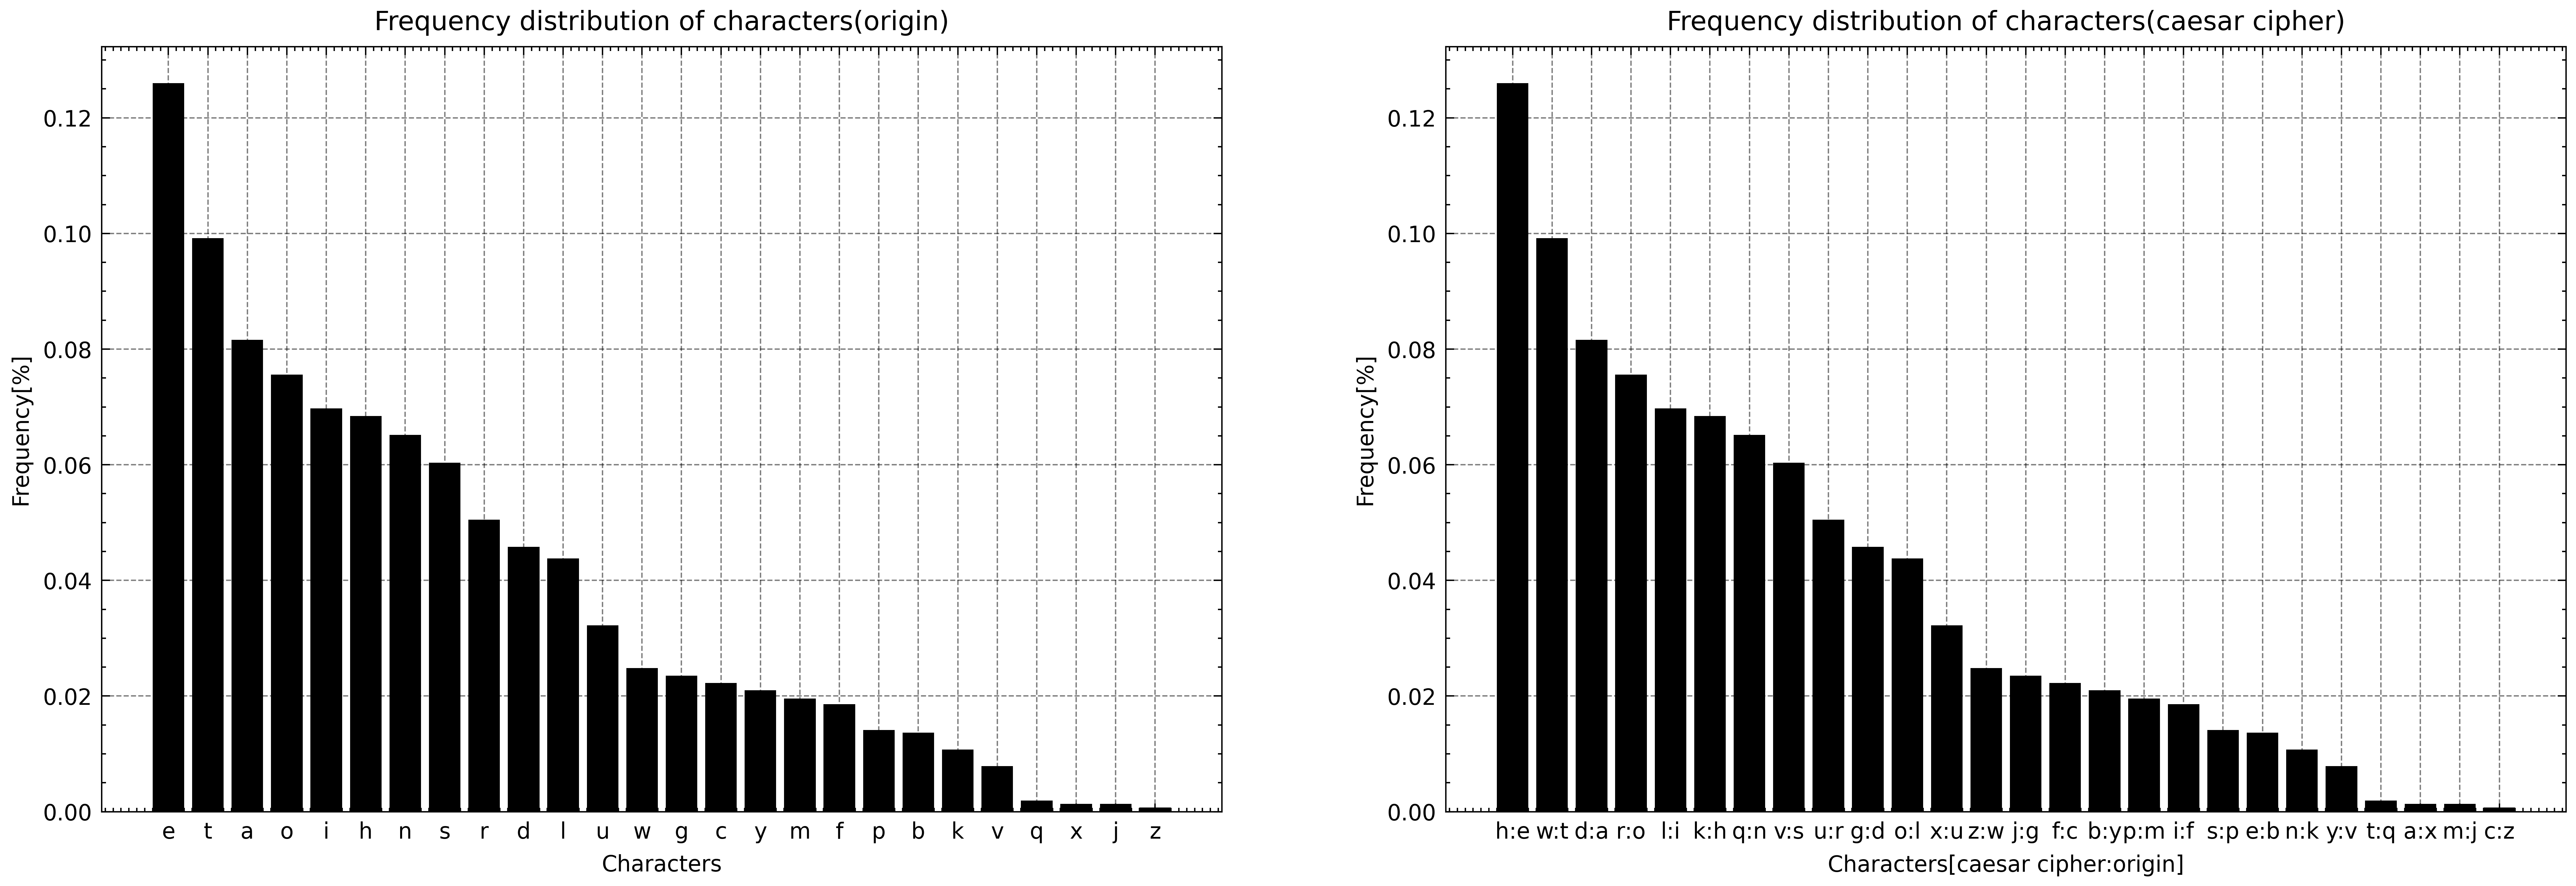

In [22]:
# 可視化
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.bar(text_chars_sort, chars_percent_sort)
plt.title('Frequency distribution of characters(origin)')
plt.xlabel('Characters')
plt.ylabel('Frequency[%]')

plt.subplot(1, 2, 2)
plt.bar(caesar_origin_sort, caesar_chars_percent_sort)
plt.title('Frequency distribution of characters(caesar cipher)')
plt.xlabel('Characters[caesar cipher:origin]')
plt.ylabel('Frequency[%]')

plt.savefig('./frequency_distribution_of_characters_sort.png', dpi=600)

plt.show()